<a href="https://colab.research.google.com/github/chandana2005/OIBSIP/blob/main/Task02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import calendar

import datetime as dt

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML

In [ ]:
dataset1 = pd.read_csv('/content/Unemployment in India.csv')

In [ ]:
dataset1.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [ ]:
dataset1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [ ]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [ ]:
dataset1.isnull().sum()

,0
Region,14
Date,14
Frequency,14
Estimated Unemployment Rate (%),14
Estimated Employed,14
Estimated Labour Participation Rate (%),14
Area,14


In [ ]:
 print("\nData types of each column:")
 print(dataset1.dtypes)


Data types of each column:
Region                                       category
Date                                   datetime64[ns]
Frequency                                    category
Estimated Unemployment Rate                   float64
Estimated Employed                            float64
Estimated Labour Participation Rate           float64
Ordinal                                        object
dtype: object


In [ ]:
quantitative_cols = []
qualitative_cols = []

for column in dataset1.columns:
    if pd.api.types.is_numeric_dtype(dataset1[column]):
        quantitative_cols.append(column)
    else:
        qualitative_cols.append(column)

print("\nQuantitative columns:")
print(quantitative_cols)

print("\nQualitative columns:")
print(qualitative_cols)


Quantitative columns:
[' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

Qualitative columns:
['Region', ' Date', ' Frequency', 'Area']


In [ ]:
def get_measurement_scale(data):
    scale_dict = {}
    for column in data.columns:
        unique_values = data[column].nunique()
        total_values = data[column].count()
        if pd.api.types.is_numeric_dtype(data[column]):
            if unique_values == total_values:
                scale_dict[column] = "Ratio"
            else:
                scale_dict[column] = "Interval"
        else:
            if unique_values == total_values:
                scale_dict[column] = "Nominal"
            else:
                scale_dict[column] = "Ordinal"
    return scale_dict


measurement_scale = get_measurement_scale(dataset1)

print("\nMeasurement scale of each column:")
for column, scale in measurement_scale.items():
    print("\n"f"{column}: {scale}")


Measurement scale of each column:

Region: Ordinal

 Date: Ordinal

 Frequency: Ordinal

 Estimated Unemployment Rate (%): Interval

 Estimated Employed: Ratio

 Estimated Labour Participation Rate (%): Interval

Area: Ordinal


In [ ]:
dataset1.columns =['Region','Date','Frequency','Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate','Ordinal']
dataset1.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Ordinal
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural


In [ ]:
dataset1['Date'] = pd.to_datetime(dataset1['Date'], dayfirst=True)
dataset1['Frequency']= dataset1['Frequency'].astype('category')
dataset1['Date'] = pd.to_datetime(dataset1['Date'])
dataset1['Month'] = dataset1['Date'].dt.month


In [ ]:
dataset1['Region'] = dataset1['Region'].astype('category')
dataset1.drop(columns='Month',inplace=True)
dataset1.head(3)

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Ordinal
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural


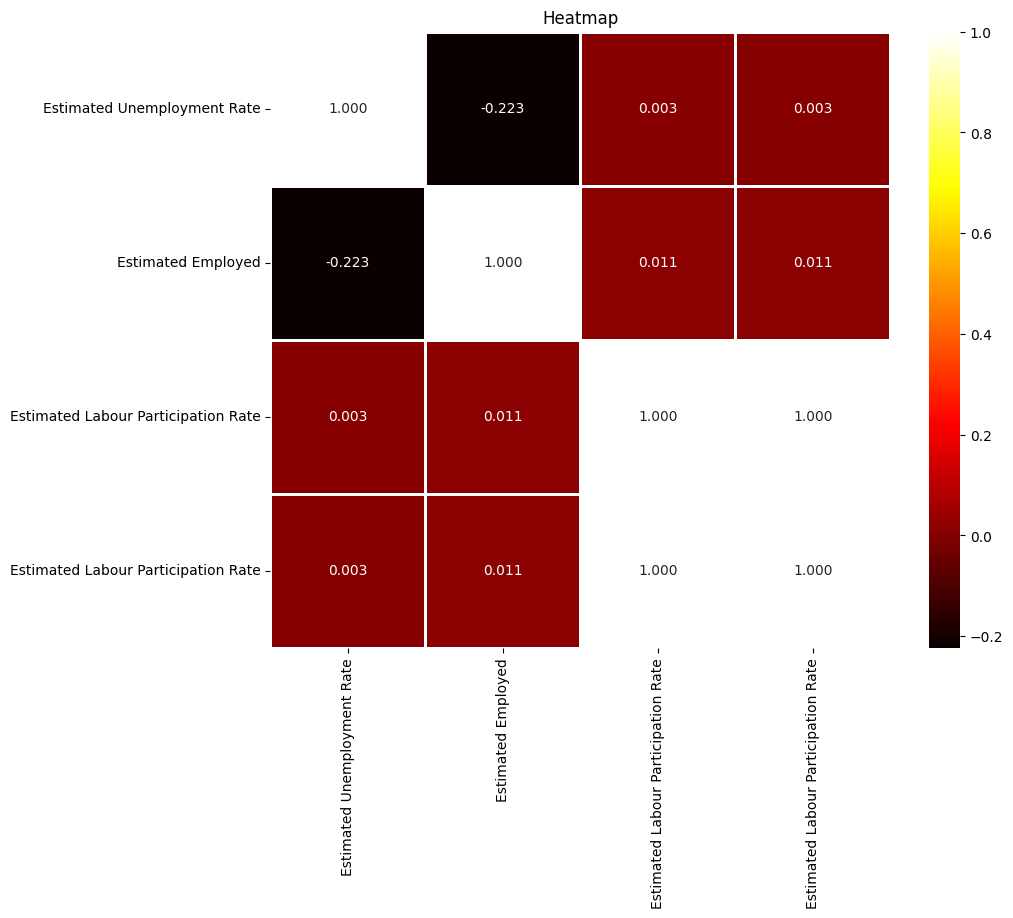

In [ ]:
heatMap = dataset1[['Estimated Unemployment Rate', 'Estimated Employed',
              'Estimated Labour Participation Rate', 'Estimated Labour Participation Rate']]

heatMap = heatMap.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(heatMap, annot=True, cmap='hot', fmt='.3f', linewidths=1)
plt.title('Heatmap')
plt.show()

In [ ]:
import plotly.express as px

newDF = dataset1[['Estimated Unemployment Rate', 'Region']]
newDF = newDF.groupby('Region').mean().reset_index()
newDF = newDF.sort_values('Estimated Unemployment Rate')

fig = px.bar(newDF,
             x='Region',
             y='Estimated Unemployment Rate',
             color='Region',
             title='Regiion-wise Average Unemployment Rate',
             labels={'Estimated Unemployment Rate ': 'Average Unemployment Rate'},
             hover_name='Region',
             hover_data={'Estimated Unemployment Rate': True},
             template='plotly_dark',
             color_discrete_sequence=px.colors.qualitative.Pastel,
             text='Estimated Unemployment Rate'
             )

fig.update_layout(xaxis_title='Region', yaxis_title='Average Unemployment Rate',
                  hoverlabel=dict(bgcolor="white", font_size=12, font_family="Arial"),
                  uniformtext_minsize=8, uniformtext_mode='hide',
                  )

fig.update_traces(textposition='outside')

fig.show()

<ipython-input-41-db1c09f64e82>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newDF = newDF.groupby('Region').mean().reset_index()
/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(required_grouper, sort=False)  # skip one_group groupers


In [ ]:
fig = px.bar(dataset1,
             x='Region',
             y='Estimated Unemployment Rate',
             animation_frame='Date',
             color='Region',
             title='Region-wise Unemployment Rate',
             height=600)

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 700

fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:1971: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<ipython-input-54-04f2cefafa88>:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



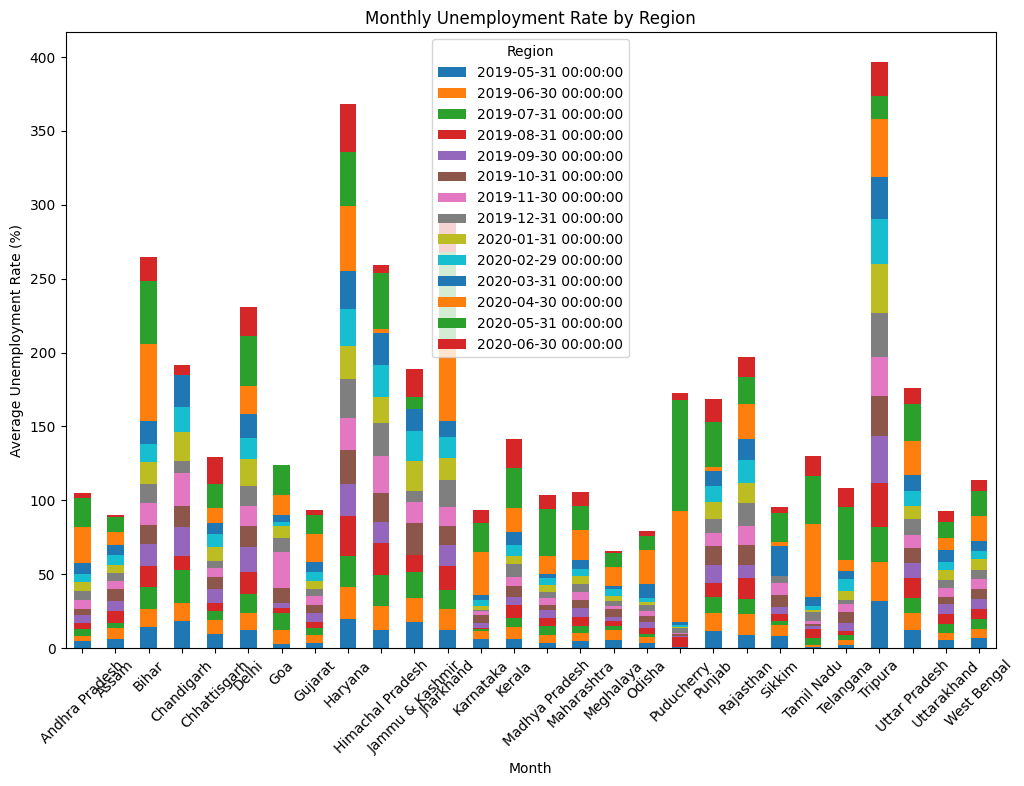

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

df = dataset1
df_grouped = df.groupby(['Region', 'Date'])['Estimated Unemployment Rate'].mean().unstack()
df_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Monthly Unemployment Rate by Region')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.show()

<ipython-input-56-4c145c27894b>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-56-4c145c27894b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




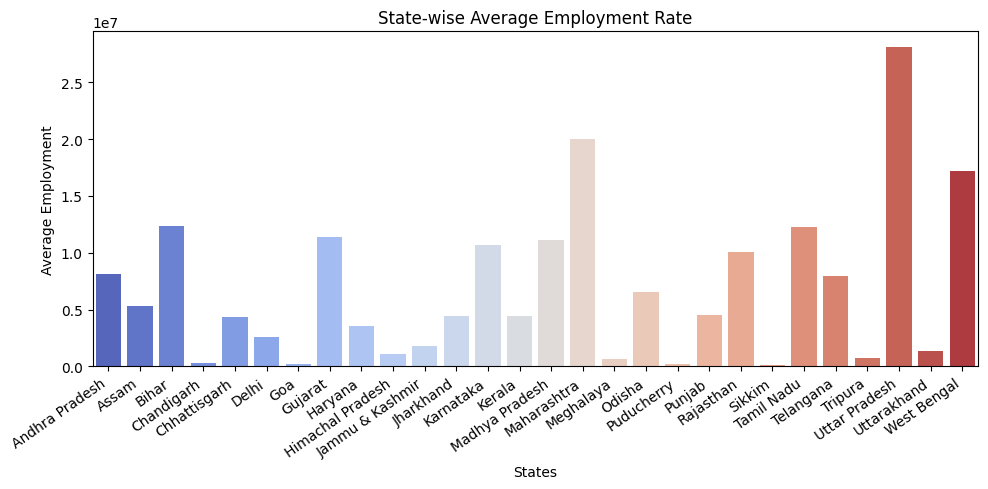

In [ ]:
state_avg_employment = dataset1.groupby('Region')['Estimated Employed'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=state_avg_employment.index, y=state_avg_employment.values, palette='coolwarm')
plt.title('State-wise Average Employment Rate')
plt.xlabel('States')
plt.ylabel('Average Employment')
plt.xticks(rotation=35, ha='right')
plt.tight_layout()
plt.show()


<ipython-input-57-c5ca756d1f82>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




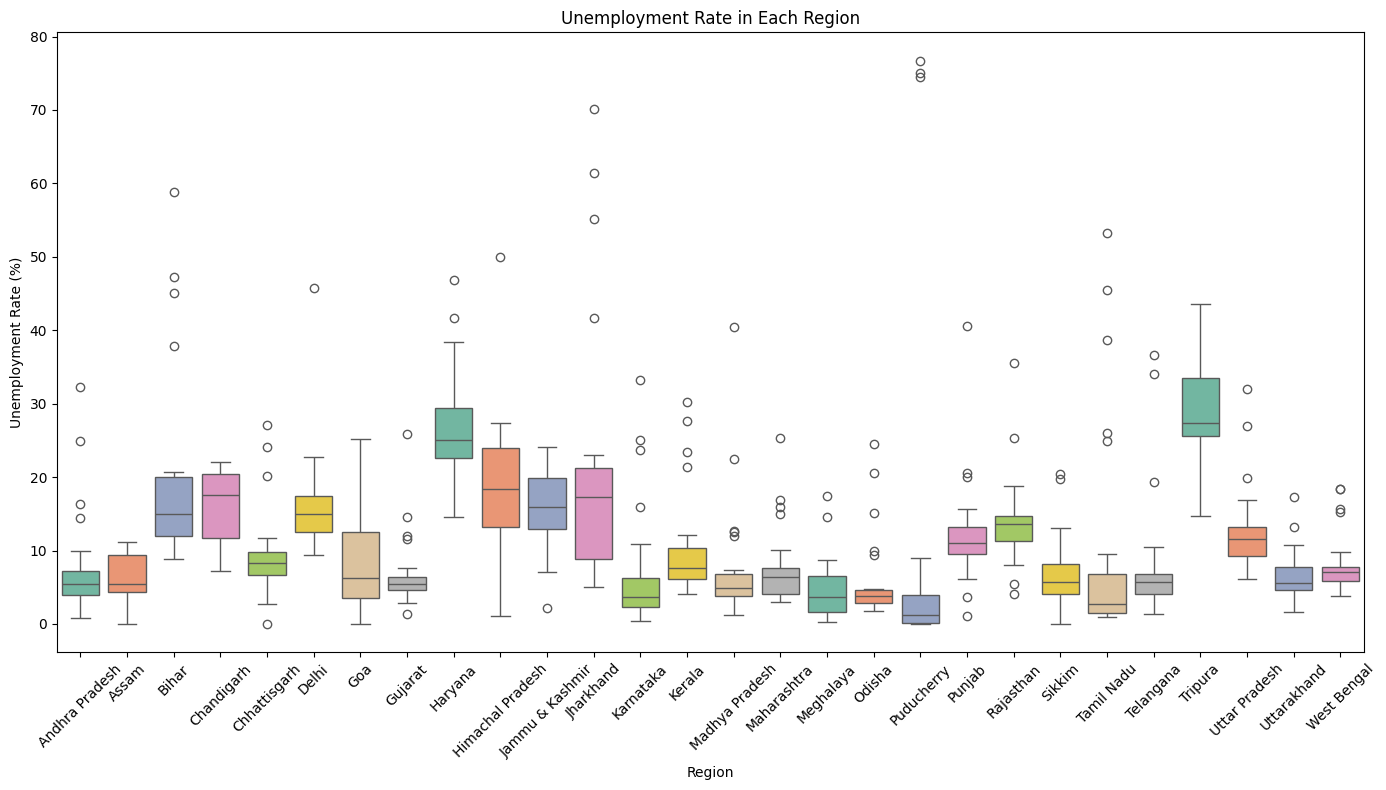

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=dataset1, x='Region', y='Estimated Unemployment Rate', palette='Set2')
plt.title('Unemployment Rate in Each Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

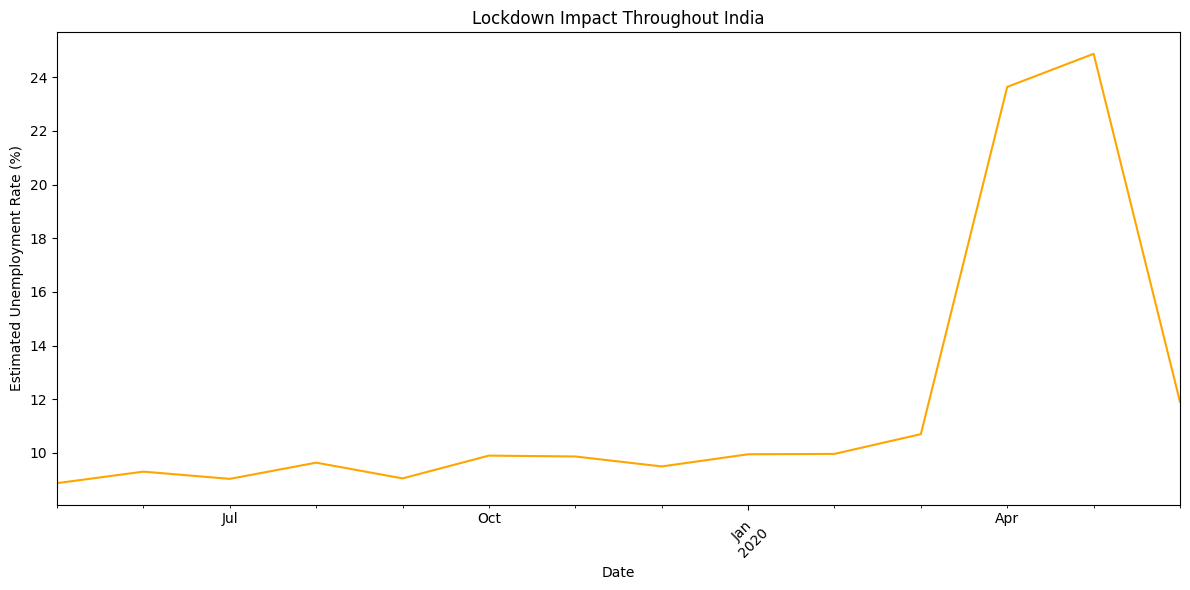

In [ ]:
lockdown_impact = dataset1.groupby('Date')['Estimated Unemployment Rate'].mean()
plt.figure(figsize=(12, 6))
lockdown_impact.plot(color='orange')
plt.title('Lockdown Impact Throughout India')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
